# Iris Dataset Analysis & Classification

In [46]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt # Graphmodel - Detailed model
import seaborn as sns # Graphmodel - Simple model

## Loading the dataset

In [47]:
!pip install ucimlrepo

In [48]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 

In [49]:
df = pd.concat([X, y], axis=1)
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
# to display stats about data
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [51]:
# to display basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [52]:
# to display no. of samples on each class
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Preporcessing the dataset

In [53]:
# Check for null values
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

## Exploratory Data Analysis

### Histograms

<Axes: >

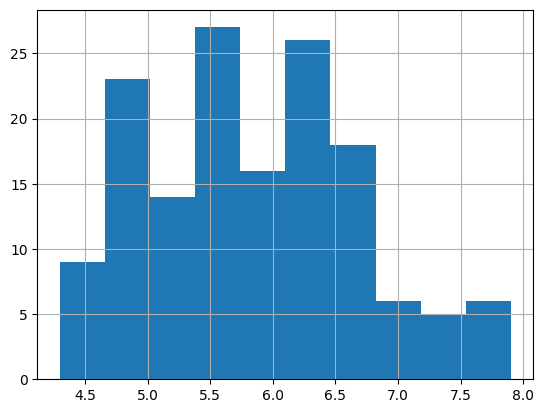

In [54]:
df['sepal length'].hist()
# count on the y-axis and values on x-axis

<Axes: >

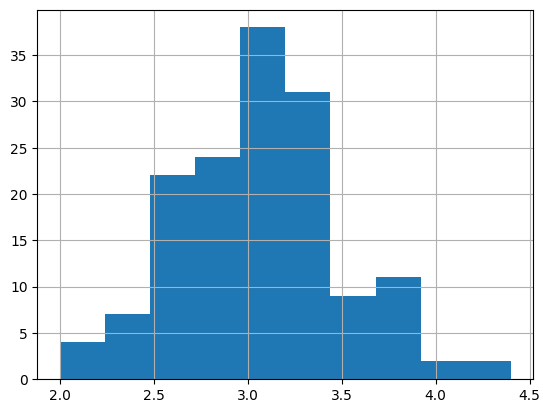

In [55]:
df['sepal width'].hist()

<Axes: >

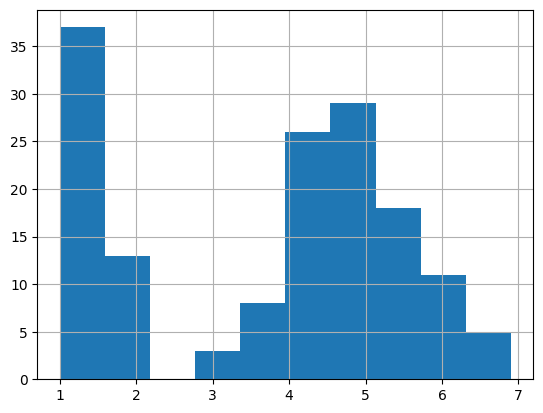

In [56]:
df['petal length'].hist()

<Axes: >

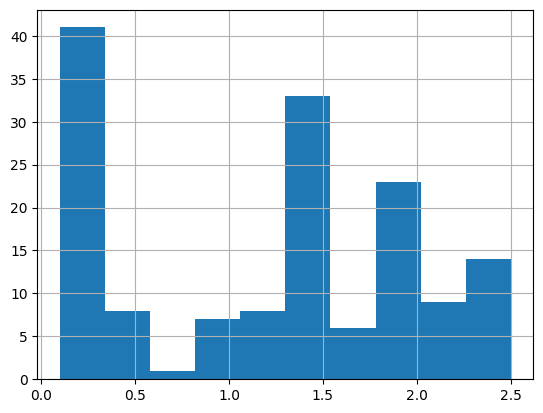

In [57]:
df['petal width'].hist()

### Scatterplot

In [58]:
# class
# Iris-setosa        50
# Iris-versicolor    50
# Iris-virginica     50

colors = ['red','orange','blue']
classes = ['Iris-virginica','Iris-versicolor','Iris-setosa']

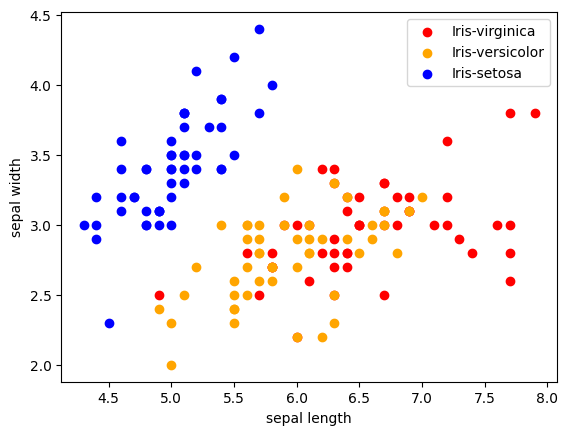

In [59]:
for i in range(3):
    x = df[df['class'] == classes[i]]
    plt.scatter(x['sepal length'], x['sepal width'], 
                c = colors[i], label = classes[i])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

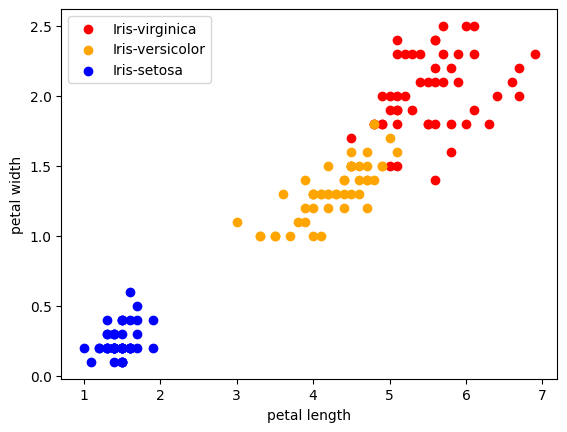

In [60]:
for i in range(3):
    x = df[df['class'] == classes[i]]
    plt.scatter(x['petal length'], x['petal width'], 
                c = colors[i], label = classes[i])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()

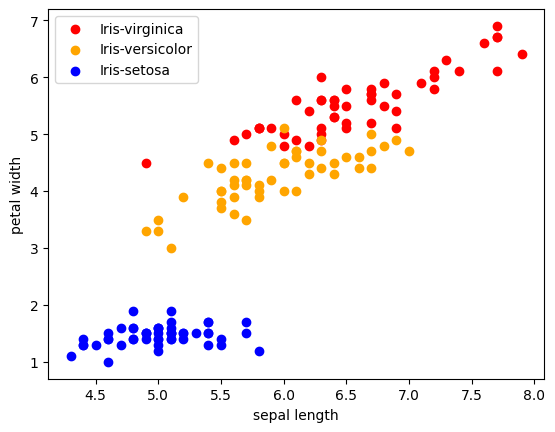

In [61]:
for i in range(3):
    x = df[df['class'] == classes[i]]
    plt.scatter(x['sepal length'], x['petal length'], 
                c = colors[i], label = classes[i])
plt.xlabel("sepal length")
plt.ylabel("petal width")
plt.legend()

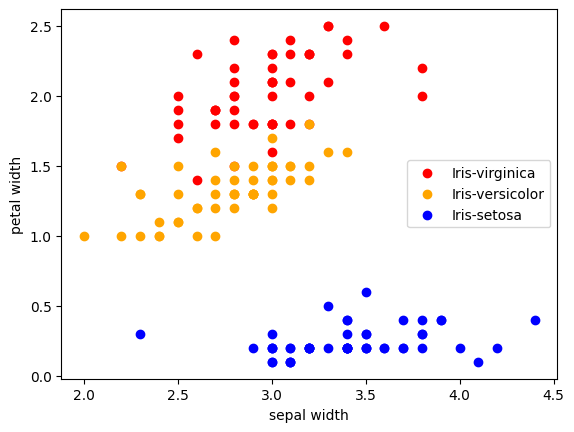

In [62]:
for i in range(3):
    x = df[df['class'] == classes[i]]
    plt.scatter(x['sepal width'], x['petal width'], 
                c = colors[i], label = classes[i])
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.legend()

### Coorelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlationn, we can neglect one varible from those two

In [63]:
X.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

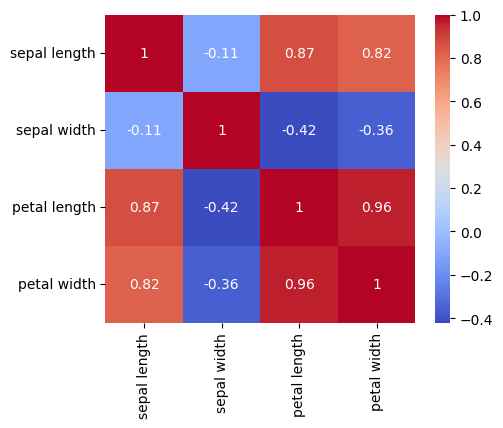

In [64]:
corr = X.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

## Label Encoder
In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These lables can be in the form of words or numbers. Lable Encoding referes to converting labels into numberic form so as to convert it into the machine-readable form.

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [66]:
df['class'] = le.fit_transform(df['class'])
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model Training

In [67]:
from sklearn.model_selection import train_test_split
# train - 70%
#test - 30%

x_train,x_test, y_train, y_test = train_test_split(X, y, test_size= 0.30)

In [68]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [69]:
# logistic regression model training
model.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [70]:
# print metric to get performance
print("Accuracy", model.score(x_test, y_test) * 100)

Accuracy 100.0


In [71]:
# knn = k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [72]:
# knn model training
model.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [73]:
# print metric to get performance
print("Accuracy", model.score(x_test, y_test) * 100)

Accuracy 97.77777777777777


In [74]:
# high level model - decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [75]:
# decision tree model training
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [76]:
# print metric to get performance
print("Accuracy", model.score(x_test, y_test) * 100)

Accuracy 95.55555555555556


In [77]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# gaussian naive bayes model training
model.fit(x_train, y_train)

# print metric to get performance
print("Accuracy", model.score(x_test, y_test) * 100)

Accuracy 95.55555555555556


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

# Instantiate the model
model = SVC()

# Train the model
model.fit(x_train, y_train)

# Print metrics to get performance
print("Accuracy:", model.score(x_test, y_test) * 100)


Accuracy: 97.77777777777777


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
model = RandomForestClassifier()

# Train the model
model.fit(x_train, y_train)

# Print metrics to get performance
print("Accuracy:", model.score(x_test, y_test) * 100)


/tmp/ipykernel_33/2102683219.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Accuracy: 97.77777777777777


In [81]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
model = GradientBoostingClassifier()

# Train the model
model.fit(x_train, y_train)

# Print metrics to get performance
print("Accuracy:", model.score(x_test, y_test) * 100)


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 97.77777777777777


In [82]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# Instantiate the model
model = AdaBoostClassifier()

# Train the model
model.fit(x_train, y_train)

# Print metrics to get performance
print("Accuracy:", model.score(x_test, y_test) * 100)


Accuracy: 93.33333333333333


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

# Instantiate the model
model = ExtraTreesClassifier()

# Train the model
model.fit(x_train, y_train)

# Print metrics to get performance
print("Accuracy:", model.score(x_test, y_test) * 100)


/tmp/ipykernel_33/2526534173.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Accuracy: 95.55555555555556


In [84]:
# CatBoost
from catboost import CatBoostClassifier

# Instantiate the model
model = CatBoostClassifier()

# Train the model
model.fit(x_train, y_train)

# Print metrics to get performance
print("Accuracy:", model.score(x_test, y_test) * 100)


Learning rate set to 0.070535
0:	learn: 1.0067306	total: 466us	remaining: 466ms
1:	learn: 0.9267508	total: 969us	remaining: 484ms
2:	learn: 0.8744012	total: 1.41ms	remaining: 467ms
3:	learn: 0.8245979	total: 1.91ms	remaining: 475ms
4:	learn: 0.7746044	total: 2.38ms	remaining: 473ms
5:	learn: 0.7283492	total: 2.82ms	remaining: 467ms
6:	learn: 0.6915673	total: 3.22ms	remaining: 457ms
7:	learn: 0.6510649	total: 3.66ms	remaining: 453ms
8:	learn: 0.6187700	total: 4.5ms	remaining: 495ms
9:	learn: 0.5904185	total: 5ms	remaining: 495ms
10:	learn: 0.5591262	total: 5.44ms	remaining: 489ms
11:	learn: 0.5342024	total: 5.81ms	remaining: 479ms
12:	learn: 0.5070466	total: 6.23ms	remaining: 473ms
13:	learn: 0.4857308	total: 6.62ms	remaining: 466ms
14:	learn: 0.4655947	total: 7.03ms	remaining: 461ms
15:	learn: 0.4433230	total: 7.42ms	remaining: 456ms
16:	learn: 0.4247061	total: 7.81ms	remaining: 451ms
17:	learn: 0.4078536	total: 8.16ms	remaining: 445ms
18:	learn: 0.3935385	total: 8.51ms	remaining: 440m